In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [14]:
df = pd.read_csv('../data/train_dataset.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# separate the features into categorical and numerical
cat_cols = ["hearing(left)", "hearing(right)", "Urine protein", "dental caries"]
num_cols = [col for col in df.columns if col not in cat_cols and col not in ["smoking"]]
print(num_cols)
df

['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp']


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


<Axes: title={'center': 'Groupby Age and Smoking(Mean)'}, xlabel='age'>

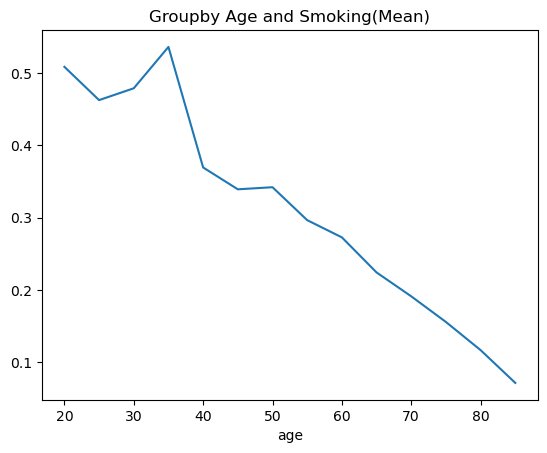

In [15]:
# EDA. groupby1: groupby age and plot smoking
df.groupby('age').mean()['smoking'].plot(title='Groupby Age and Smoking(Mean)')

'\ninteresting feature here seems to be dental_caries,\nbecause people who smoke are more likely to have caries.\n'

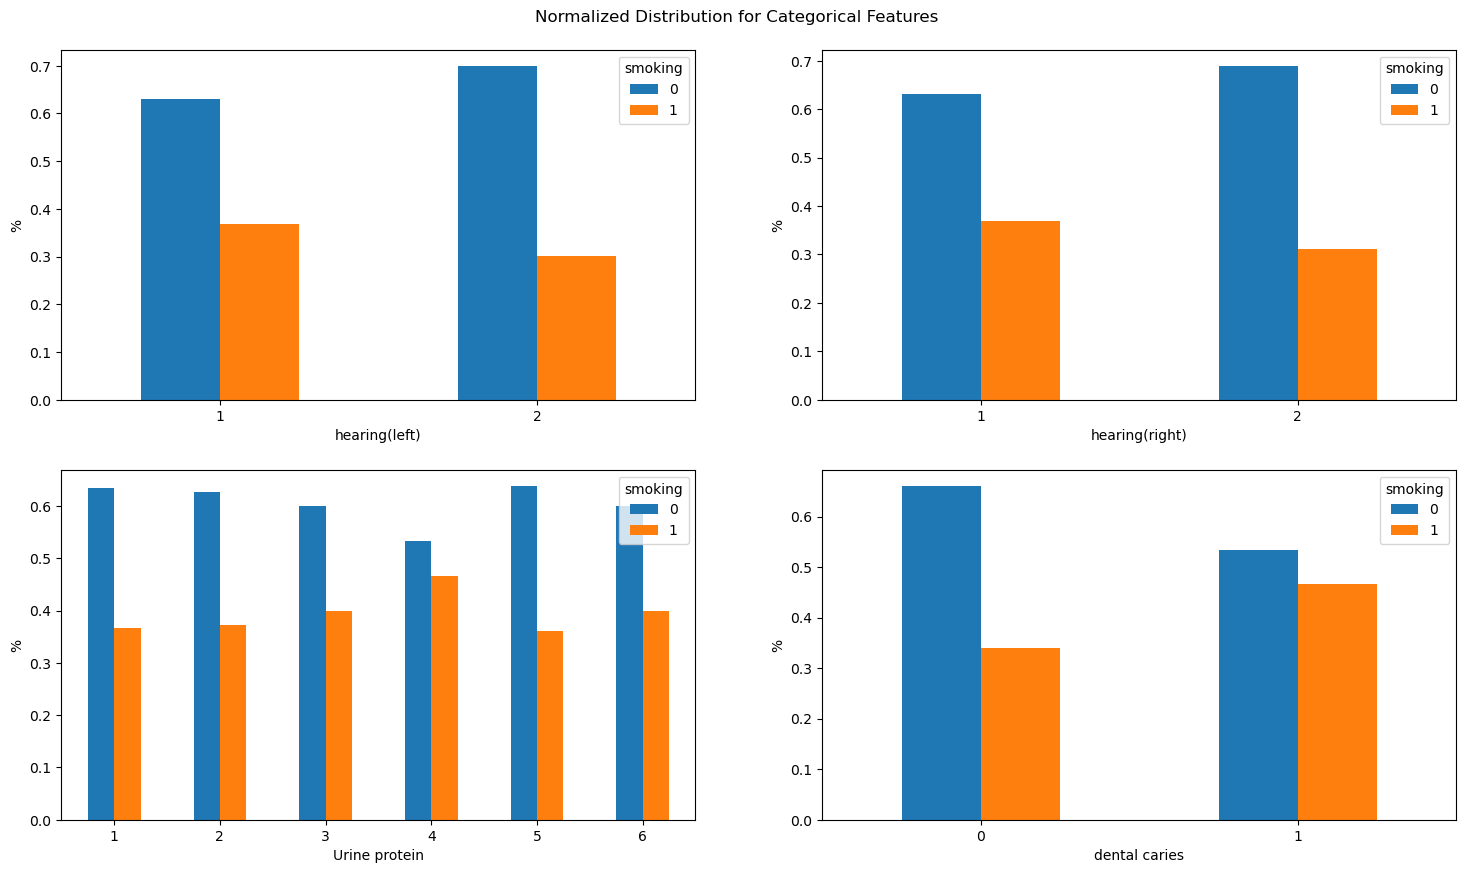

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle("Normalized Distribution for Categorical Features", y=0.92)
n_col = 0
n_row = 0

for i, col in enumerate(cat_cols):
    ct = pd.crosstab(df[col], df["smoking"], normalize="index")
    
    if i <= 1:
        ct.plot(kind="bar", ax=ax[n_row, n_col], ylabel="%", rot=0)
        n_col += 1
    if i > 1:
        n_row = 1
        ct.plot(kind="bar", ax=ax[n_row, n_col - 2], ylabel="%", rot=0)
        n_col += 1

"""
interesting feature here seems to be dental_caries,
because people who smoke are more likely to have caries.
"""
    

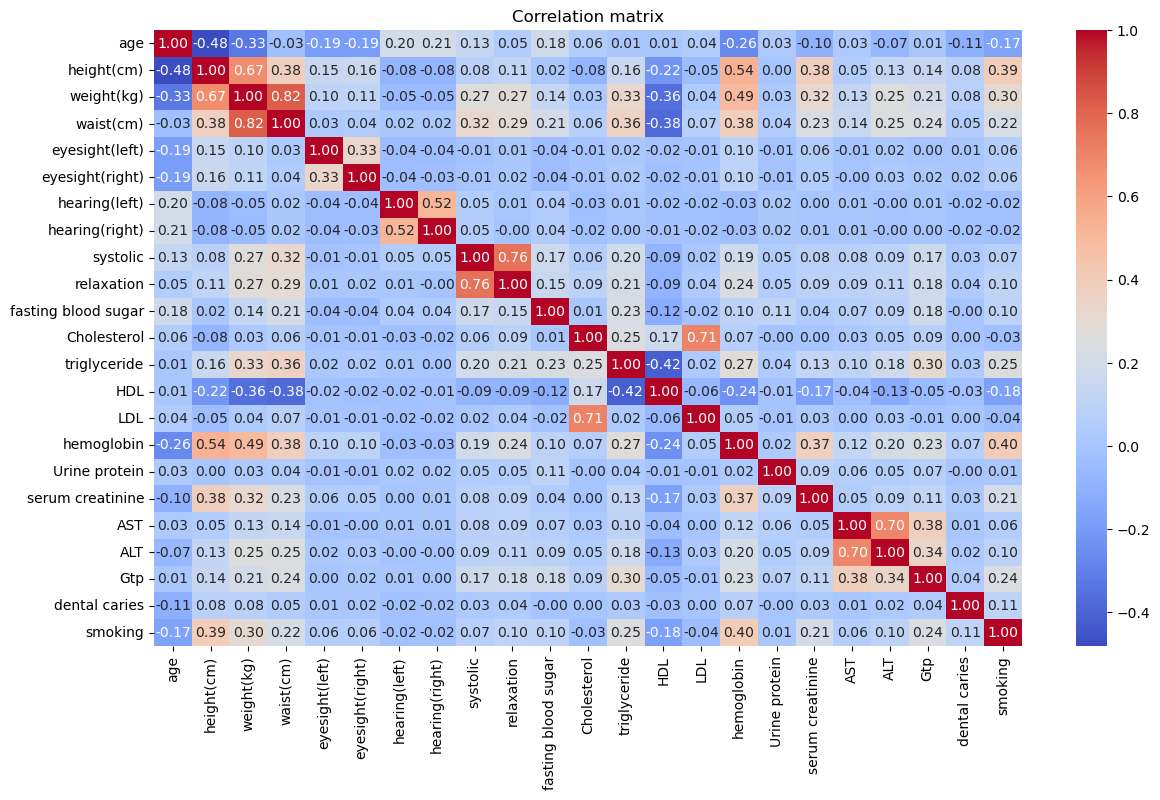

'\nSome features are highly correlated with each other,\nsuch as cholesterol with ldl, systolic with relaxation, and waist_cm with weight_kg.\n'

In [17]:
fig = plt.figure(figsize=(14, 8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation matrix")

plt.show()

"""
Some features are highly correlated with each other,
such as cholesterol with ldl, systolic with relaxation, and waist_cm with weight_kg.
"""

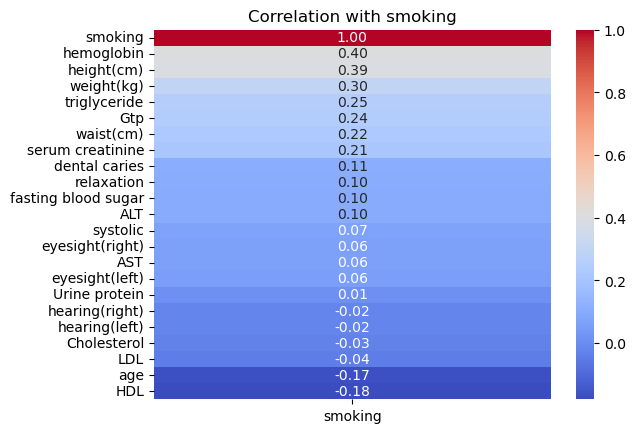

'\nhemoglobin and height, weight shows high correlation with smoking\n'

In [18]:
corr_smoking = corr["smoking"].sort_values(ascending=False).to_frame()
sns.heatmap(corr_smoking, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation with smoking")

plt.show()

"""
hemoglobin and height, weight shows high correlation with smoking
"""

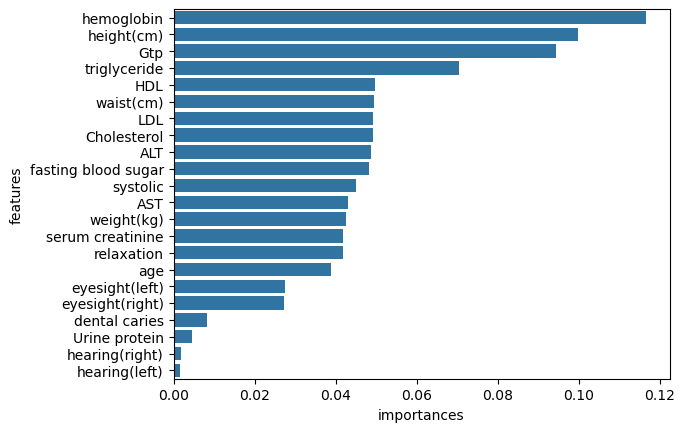

"\nFirst of all, let's explore the contribution of each feature to our future models.\nBy doing it, we can ensure that we'll have the best features to deliver to our models.\n"

In [19]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# Extract the feature importances
importances = forest.feature_importances_

# Create a DataFrame
importances_df = pd.DataFrame(data=importances, index=X.columns).reset_index()
importances_df.rename(columns={"index": "features", 0: "importances"}, inplace=True)
importances_df.sort_values("importances", ascending=False, inplace=True)

# Plot the results
sns.barplot(data=importances_df, x="importances", y="features", color="C0")

plt.show()

"""
First of all, let's explore the contribution of each feature to our future models.
By doing it, we can ensure that we'll have the best features to deliver to our models.
"""